# Importación de librerías

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, mean_squared_error,accuracy_score, mean_absolute_error

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.ensemble import RandomForestClassifier  # Para clasificación
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

# Introducción

# Context: 

### Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.


Content:


The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Inspiration
The data-set aims to answer the following key questions:


Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

How does Infant and Adult mortality rates affect life expectancy?

Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

What is the impact of schooling on the lifespan of humans?

Does Life Expectancy have positive or negative relationship with drinking alcohol?

Do densely populated countries tend to have lower life expectancy?

What is the impact of Immunization coverage on life Expectancy?


# Explorar los datos

In [4]:
data = pd.read_csv('Life_Expectancy_Data.csv')

In [5]:
data

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [6]:
data.shape

(2938, 22)

In [9]:
data.min()

Country                            Afghanistan
Year                                      2000
Status                               Developed
Life expectancy                           36.3
Adult Mortality                            1.0
infant deaths                                0
Alcohol                                   0.01
percentage expenditure                     0.0
Hepatitis B                                1.0
Measles                                      0
 BMI                                       1.0
under-five deaths                            0
Polio                                      3.0
Total expenditure                         0.37
Diphtheria                                 2.0
 HIV/AIDS                                  0.1
GDP                                    1.68135
Population                                34.0
 thinness  1-19 years                      0.1
 thinness 5-9 years                        0.1
Income composition of resources            0.0
Schooling    

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<Axes: >

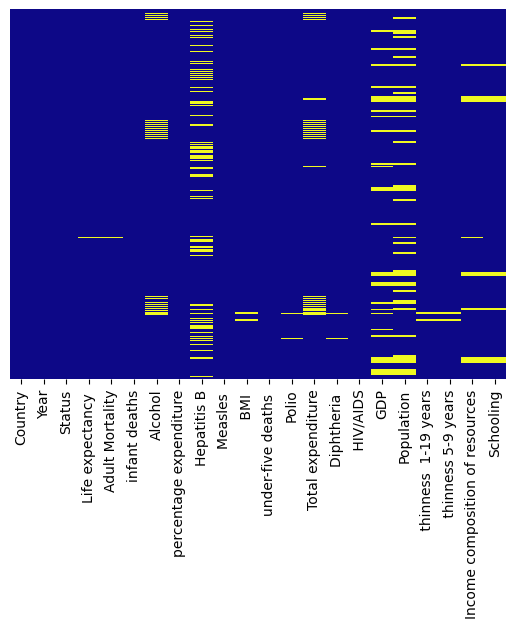

In [7]:
#Visualizar para comprobar si existen valores nulos en mis datos, usando un heatmap (usando isnull) 
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap = 'plasma')

In [8]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

# Preprocesamiento

In [9]:
data.isnull().sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
data.isnull().sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
lb=LabelEncoder()
data['Status']=lb.fit_transform(data['Status'])

In [12]:
data = data.drop('Country', axis=1)
data.fillna(value=data.mean(),inplace=True)
data_shape =data.shape
data_shape

(2938, 21)

In [13]:
data.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
data.columns = data.columns.str.strip()

In [15]:
data

Year  Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0     2015       1             65.0            263.0             62     0.01   
1     2014       1             59.9            271.0             64     0.01   
2     2013       1             59.9            268.0             66     0.01   
3     2012       1             59.5            272.0             69     0.01   
4     2011       1             59.2            275.0             71     0.01   
...    ...     ...              ...              ...            ...      ...   
2933  2004       1             44.3            723.0             27     4.36   
2934  2003       1             44.5            715.0             26     4.06   
2935  2002       1             44.8             73.0             25     4.43   
2936  2001       1             45.3            686.0             25     1.72   
2937  2000       1             46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0                  71.279624         65.0     1154  19.1  ...    6.0   
1                  73.523582         62.0      492  18.6  ...   58.0   
2                  73.219243         64.0      430  18.1  ...   62.0   
3                  78.184215         67.0     2787  17.6  ...   67.0   
4                   7.097109         68.0     3013  17.2  ...   68.0   
...                      ...          ...      ...   ...  ...    ...   
2933                0.000000         68.0       31  27.1  ...   67.0   
2934                0.000000          7.0      998  26.7  ...    7.0   
2935                0.000000         73.0      304  26.3  ...   73.0   
2936                0.000000         76.0      529  25.9  ...   76.0   
2937                0.000000         79.0     1483  25.5  ...   78.0   

      Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0                  8.16        65.0       0.1  584.259210  33736494.0   
1                  8.18        62.0       0.1  612.696514    327582.0   
2                  8.13        64.0       0.1  631.744976  31731688.0   
3                  8.52        67.0       0.1  669.959000   3696958.0   
4                  7.87        68.0       0.1   63.537231   2978599.0   
...                 ...         ...       ...         ...         ...   
2933               7.13        65.0      33.6  454.366654  12777511.0   
2934               6.52        68.0      36.7  453.351155  12633897.0   
2935               6.53        71.0      39.8   57.348340    125525.0   
2936               6.16        75.0      42.1  548.587312  12366165.0   
2937               7.10        78.0      43.5  547.358878  12222251.0   

      thinness  1-19 years  thinness 5-9 years  \
0                     17.2                17.3   
1                     17.5                17.5   
2                     17.7                17.7   
3                     17.9                18.0   
4                     18.2                18.2   
...                    ...                 ...   
2933                   9.4                 9.4   
2934                   9.8                 9.9   
2935                   1.2                 1.3   
2936                   1.6                 1.7   
2937                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 21 columns]

# Visualización

In [16]:
data_numeros= data.select_dtypes(include='number')
data_correlation= data_numeros.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

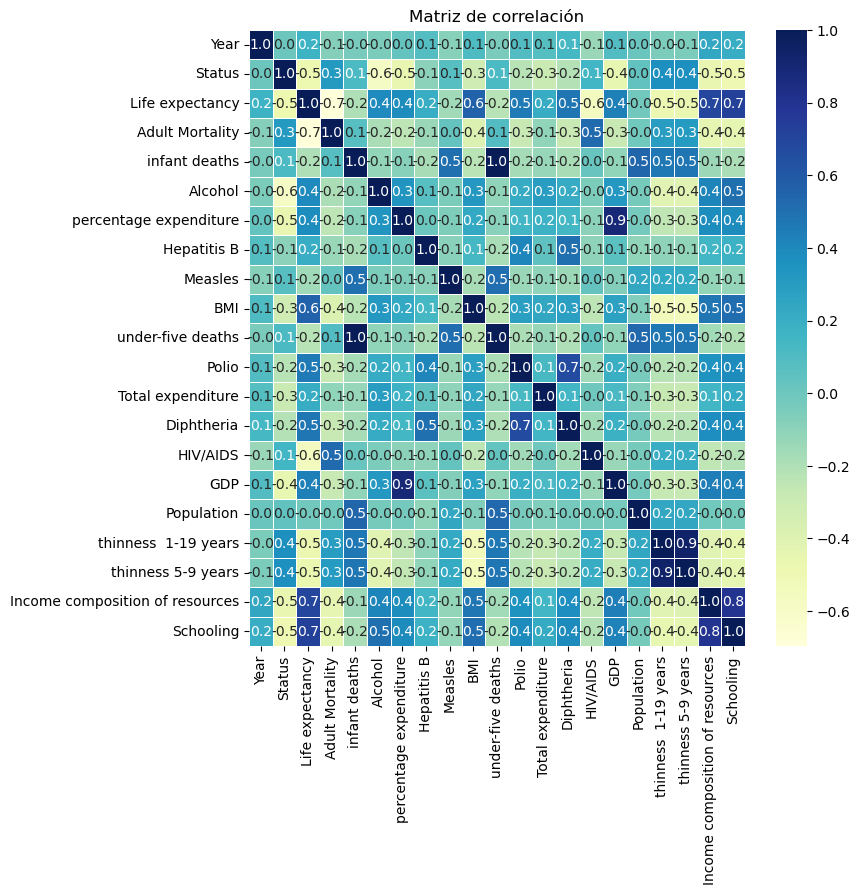

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(data_correlation, annot=True, cmap="YlGnBu", fmt= ".01f", linewidths=.5)
plt.title("Matriz de correlación")
plt.show

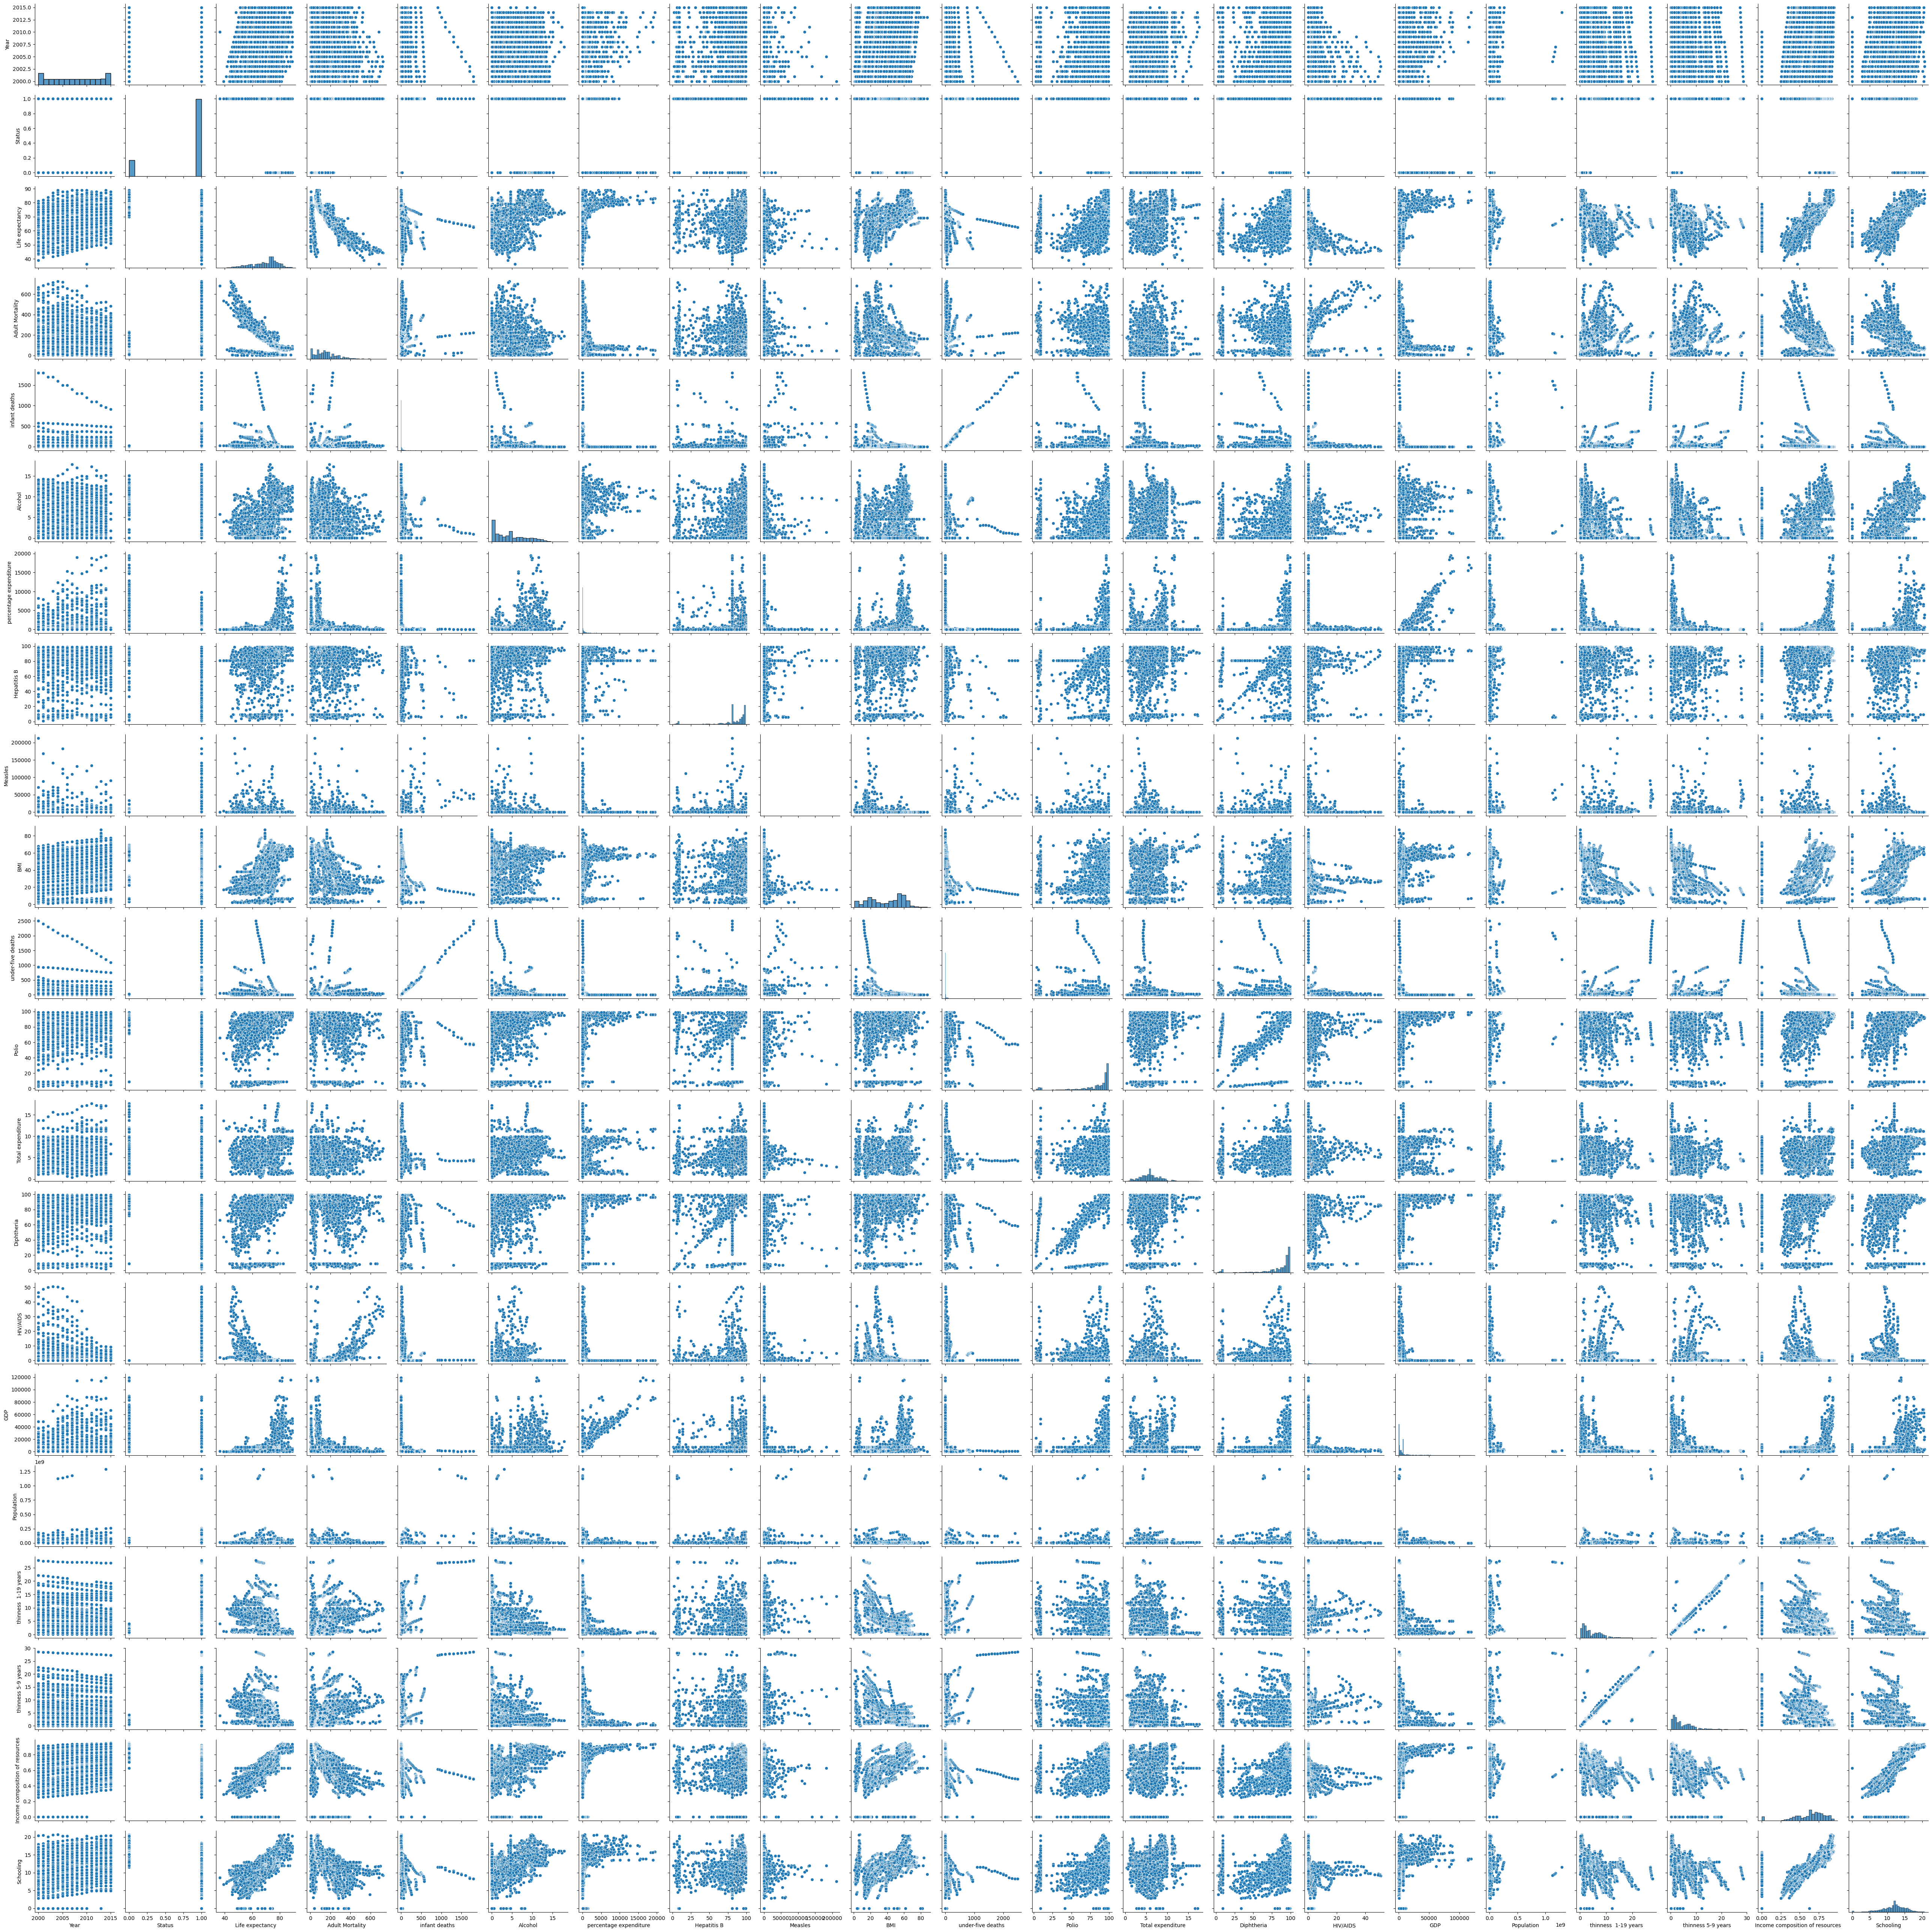

In [18]:
sns.pairplot(data)

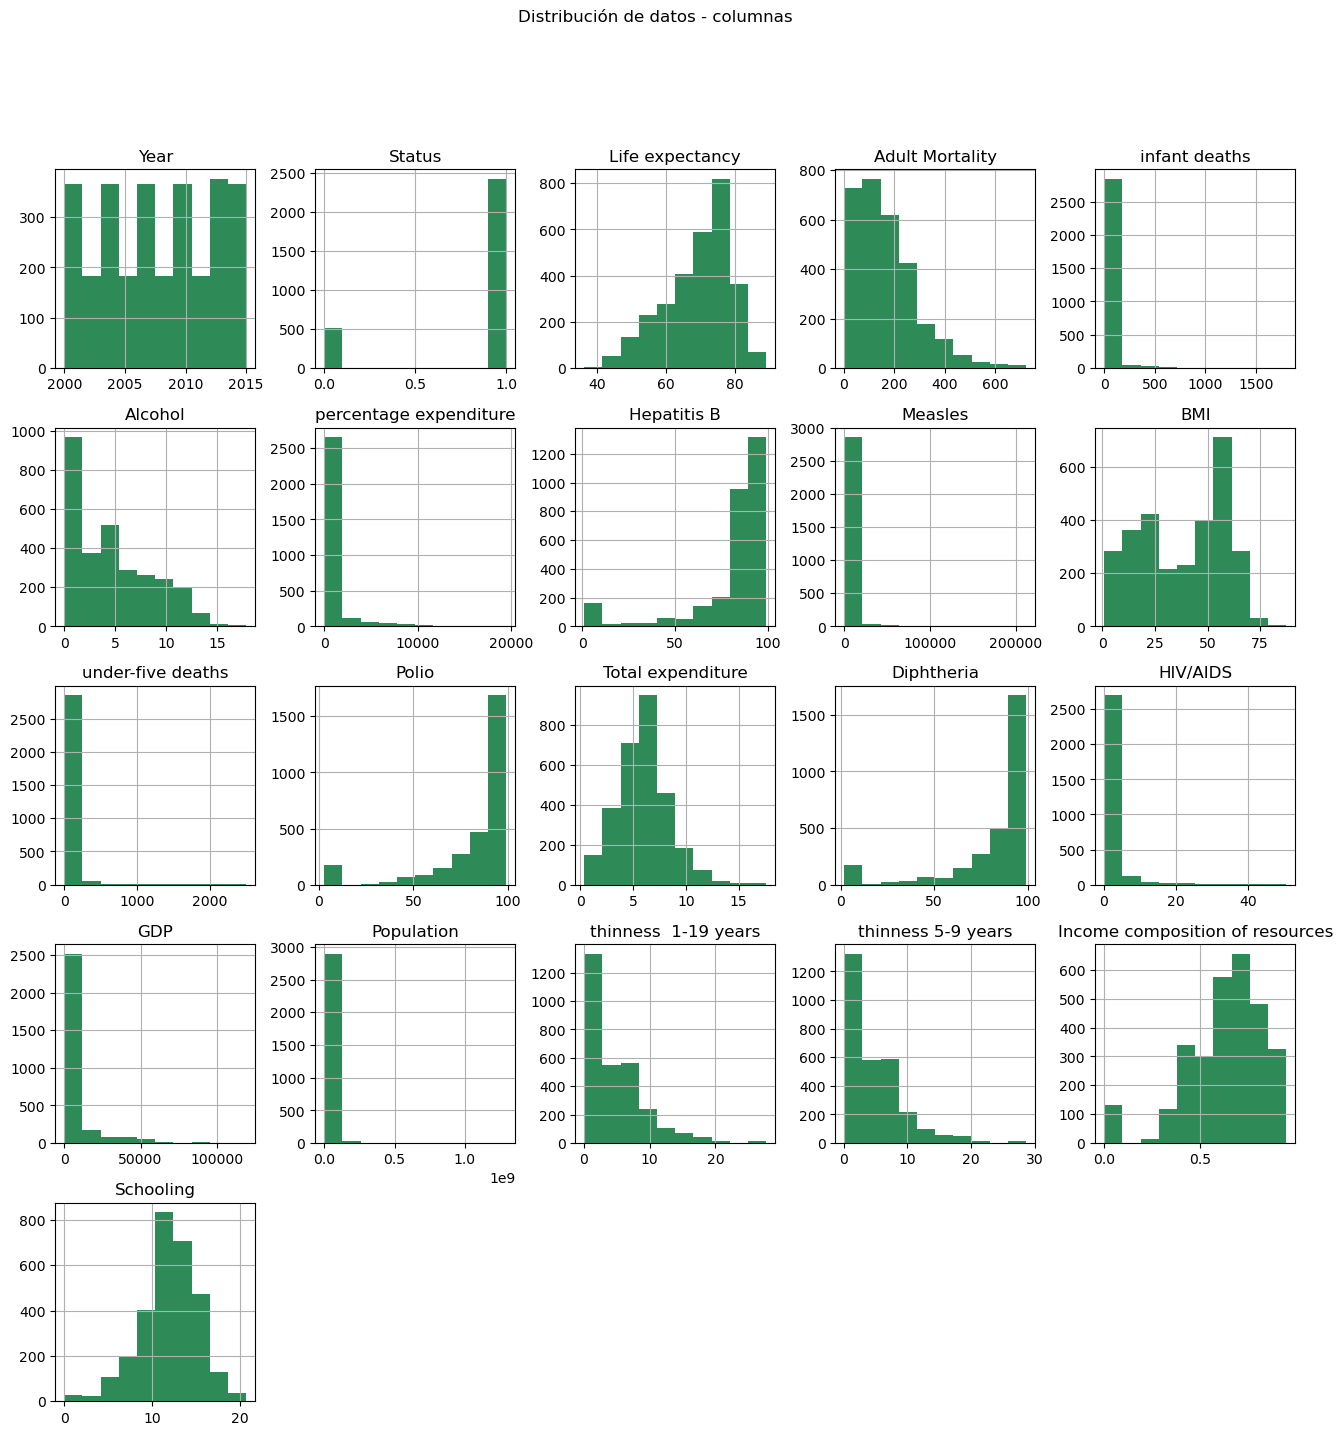

In [19]:
data.hist(bins=10, figsize=(16,16), color='seagreen')
plt.suptitle("Distribución de datos - columnas")
plt.show()

<Figure size 500x500 with 0 Axes>

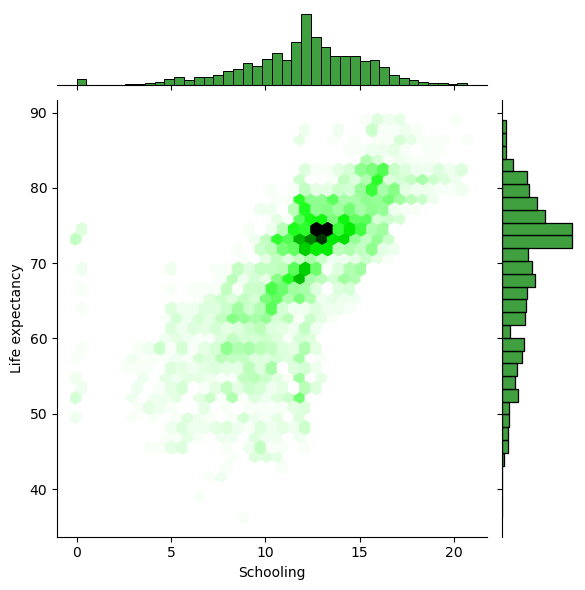

In [20]:
# Escolaridad y expectativa de vida
plt.figure(figsize=(5,5))
sns.jointplot(x=data["Schooling"], y=data['Life expectancy'], kind="hex", color="g")
plt.show()

<Figure size 500x500 with 0 Axes>

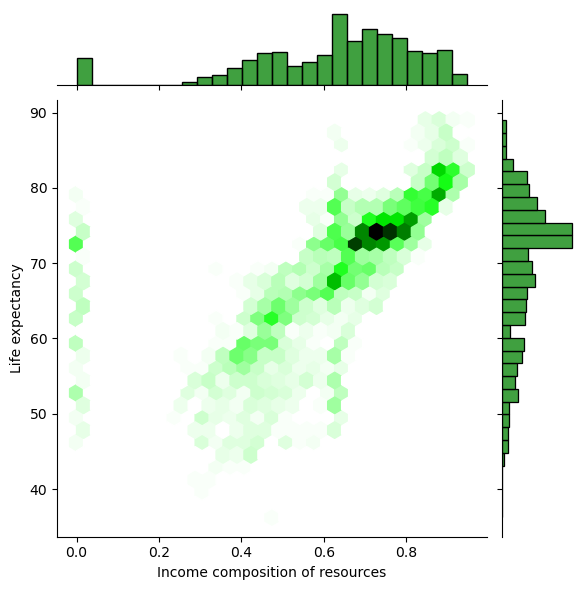

In [21]:
plt.figure(figsize=(5,5))
sns.jointplot(x=data["Income composition of resources"], y=data["Life expectancy"], kind="hex", color="g")
plt.show()

<Figure size 500x500 with 0 Axes>

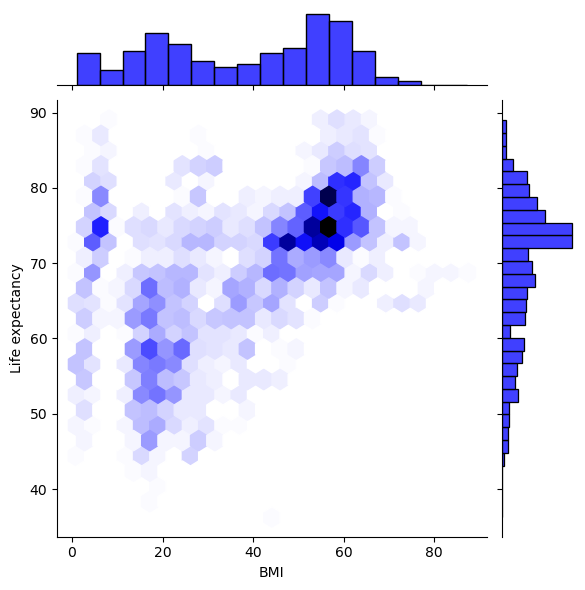

In [22]:
# BMI vs Life expectancy
plt.figure(figsize=(5,5))
sns.jointplot(x=data["BMI"], y=data["Life expectancy"], kind="hex", color="b")
plt.show()

<Figure size 500x500 with 0 Axes>

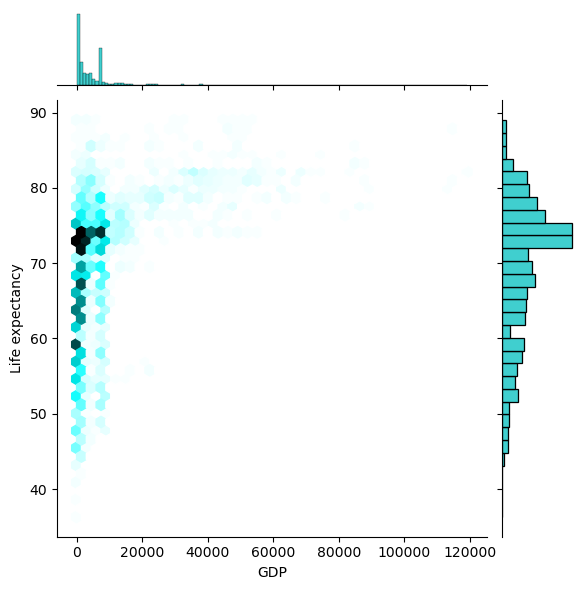

In [23]:
# GDP vs Expectativa de vida
plt.figure(figsize=(5,5))
sns.jointplot(x=data["GDP"], y=data["Life expectancy"], kind="hex", color="c")
plt.show()

<Figure size 500x500 with 0 Axes>

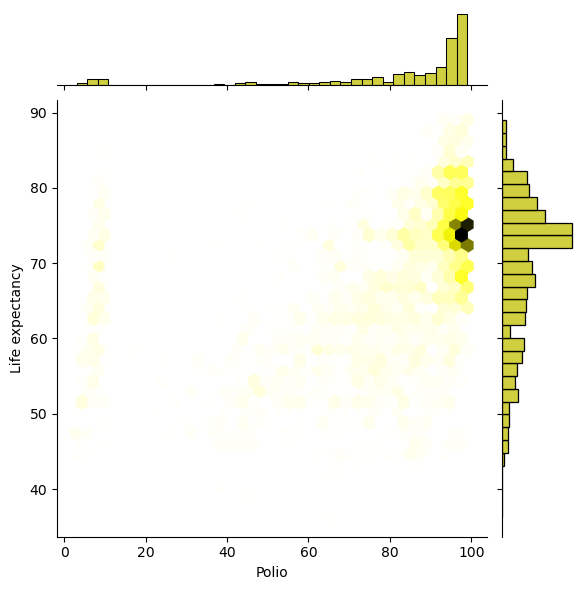

In [24]:
# Polio vs Expectativa de vida
plt.figure(figsize=(5,5))
sns.jointplot(x=data["Polio"], y=data["Life expectancy"], kind="hex", color="y")
plt.show()

<Figure size 500x500 with 0 Axes>

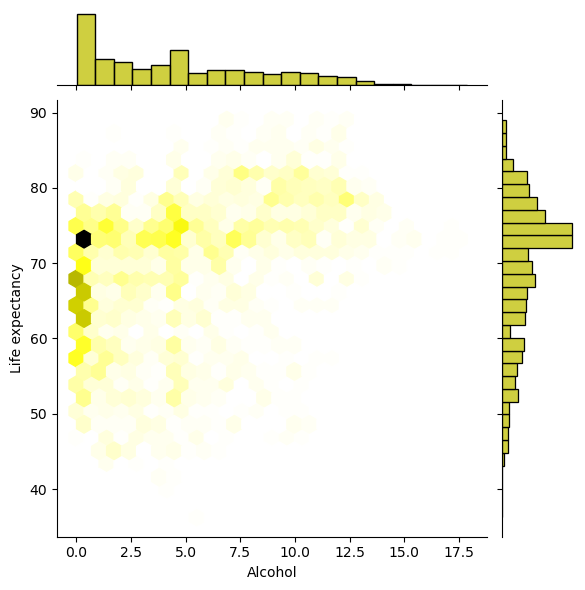

In [25]:
# Consumo de alcohol vs Expectativa de vida
plt.figure(figsize=(5,5))
sns.jointplot(x=data["Alcohol"], y=data["Life expectancy"], kind="hex", color="y")
plt.show()

# Más preprocesamiento y modelo

In [121]:
#Dividir los datos
X = data.drop(["Life expectancy"], axis=1)
y = data["Life expectancy"]

In [123]:
X.shape

(2938, 20)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [127]:
# Aquí vamos a escalar los datos

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Regresión Lineal

In [133]:
lr=linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [134]:
y_prediction=lr.predict(X_test)

In [135]:
print('\accuracy: {}%'.format(lr.score(X_test, y_test)*100))
print('\mean_abs_error:{}'.format(mean_absolute_error(y_test, y_prediction)))
print('\nrmse: {}'.format(np.sqrt(mean_squared_error(y_test, y_prediction))))

ccuracy: 82.40562394394584%
\mean_abs_error:2.858333133723936

rmse: 3.904220333983989


ValueError: x and y must be the same size

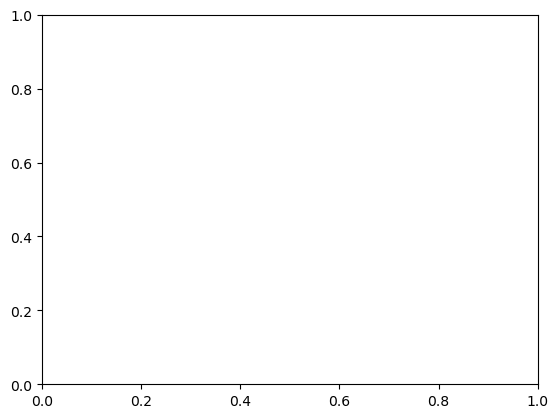

In [143]:
plt.scatter(X_train, y_test,color='g')
plt.plot(X_test, y_prediction,color='k')

# Conclusión